Can we just point at individual helpix centers and call that good enough that we don't have to dither?

In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import hpid2RaDec

In [2]:
# LSST has almost 10 sq degree FOv
nside = 128
pixArea = hp.nside2pixarea(nside, degrees=True)
npix_per_fov = 10./pixArea
print npix_per_fov

47.6591241078


In [3]:
# Let's make an array where all the southern hemisphere is pointed at this many times
ra, dec = hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))
good = np.where(dec < 30)
ra = ra[good]
dec = dec[good]

In [4]:
ra.size

147200

In [5]:
names = ['fieldRA', 'fieldDec']
types = [float] * 2
simdata = np.zeros(ra.size, dtype=zip(names, types))
simdata['fieldRA'] = np.radians(ra)
simdata['fieldDec'] = np.radians(dec)

In [6]:
metric = metrics.CountMetric(col='fieldRA')
slicer_nside = nside
slicer = slicers.HealpixSlicer(nside=slicer_nside)
sql=''
plotDict = {'colorMin':41, 'colorMax': 50}
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Running:  [0]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:105: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 312 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 42.3491  dipole: lon: -94.2894, lat: -90, amp: 4.36303
Plotting complete.


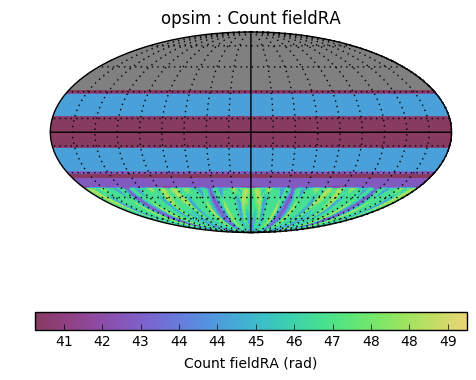

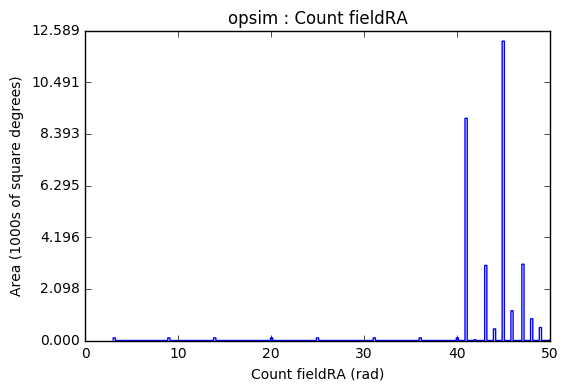

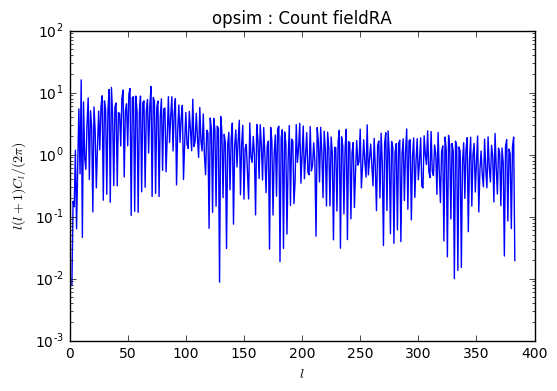

In [7]:
bgroup = metricBundles.MetricBundleGroup({0:bundle}, None, saveEarly=False)
bgroup.setCurrent('')
bgroup.runCurrent('', simData=simdata)
bgroup.plotAll(closefigs=False)

In [8]:
simdata.size

147200

Well, that was an unexpected result. I think what I'm going to end up needing to do is pack an area on the sphere with simulated electrons, and when 

In [9]:
# from https://people.sc.fsu.edu/~jburkardt/py_src/sphere_fibonacci_grid/sphere_fibonacci_grid_points.py
def sphere_fibonacci_grid_points ( ng ):

#*****************************************************************************80
#
## SPHERE_FIBONACCI_GRID_POINTS: Fibonacci spiral gridpoints on a sphere.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.
#
#  Modified:
#
#    15 May 2015
#
#  Author:
#
#    John Burkardt
#
#  Reference:
#
#    Richard Swinbank, James Purser,
#    Fibonacci grids: A novel approach to global modelling,
#    Quarterly Journal of the Royal Meteorological Society,
#    Volume 132, Number 619, July 2006 Part B, pages 1769-1793.
#
#  Parameters:
#
#    Input, integer NG, the number of points.
#
#    Output, real XG(3,N), the grid points.
#
  import numpy as np

  phi = ( 1.0 + np.sqrt ( 5.0 ) ) / 2.0

  theta = np.zeros ( ng )
  sphi = np.zeros ( ng )
  cphi = np.zeros ( ng )

# Jubus, why is there a loop here?
  for i in range ( 0, ng ):
    i2 = 2 * i - ( ng - 1 ) 
    theta[i] = 2.0 * np.pi * float ( i2 ) / phi
    sphi[i] = float ( i2 ) / float ( ng )
    cphi[i] = np.sqrt ( float ( ng + i2 ) * float ( ng - i2 ) ) / float ( ng )

  xg = np.zeros ( ( ng, 3 ) )

  for i in range ( 0, ng ) :
    xg[i,0] = cphi[i] * np.sin ( theta[i] )
    xg[i,1] = cphi[i] * np.cos ( theta[i] )
    xg[i,2] = sphi[i]

  return xg

In [10]:
ack = sphere_fibonacci_grid_points(10000)

In [11]:
ack

array([[  1.39212102e-02,  -2.48795240e-03,  -9.99900000e-01],
       [ -2.18462040e-03,  -2.43954388e-02,  -9.99700000e-01],
       [ -3.16187737e-02,   5.61124115e-05,  -9.99500000e-01],
       ..., 
       [  3.16187737e-02,   5.61124115e-05,   9.99500000e-01],
       [  2.18462040e-03,  -2.43954388e-02,   9.99700000e-01],
       [ -1.39212102e-02,  -2.48795240e-03,   9.99900000e-01]])